## Example for Naive Bayes using the Iris Data

First we need the standard import

In [11]:
from classy import *

### Load the Data

In [12]:
data=load_excel('data/iris.xls',verbose=True)

iris.data 151 5
150 vectors of length 4
Feature names: 'petal length in cm', 'petal width in cm', 'sepal length in cm', 'sepal width in cm'
Target values given.
Target names: 'Iris-setosa', 'Iris-versicolor', 'Iris-virginica'
Mean:  [ 3.75866667  1.19866667  5.84333333  3.054     ]
Median:  [ 4.35  1.3   5.8   3.  ]
Stddev:  [ 1.75852918  0.76061262  0.82530129  0.43214658]


### Look at the data

it's a good idea to look at the data a little bit, know the shapes, etc...

In [13]:
print data.vectors.shape
print data.targets
print data.target_names
print data.feature_names

(150, 4)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
['petal length in cm', 'petal width in cm', 'sepal length in cm', 'sepal width in cm']


since you can't plot 4 dimensions, try plotting some 2D subsets

I don't like the automatic placement of the legend, so lets set it manually

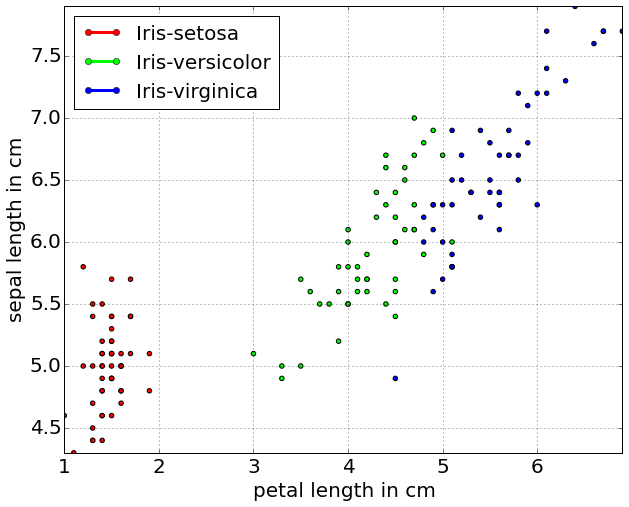

In [14]:
subset=extract_features(data,[0,2])
plot2D(subset,legend_location='upper left')

I don't want to do the classification on this subset, so make sure to use the entire data set.

## Classification

First, we choose a classifier

In [15]:
C=NaiveBayes()

Split the data into test and train subsets...

In [16]:
data_train,data_test=split(data,test_size=0.2)

Original vector shape:  (150, 4)
Train vector shape:  (120, 4)
Test vector shape:  (30, 4)


...and then train...

In [17]:
timeit(reset=True)
C.fit(data_train.vectors,data_train.targets)
print "Training time: ",timeit()

Time Reset
Training time:  0.00101590156555 seconds 


In [18]:
print "On Training Set:",C.percent_correct(data_train.vectors,data_train.targets)
print "On Test Set:",C.percent_correct(data_test.vectors,data_test.targets)

On Training Set: 95.0
On Test Set: 100.0


some classifiers have properties that are useful to look at.  Naive Bayes has  *means* and *stddevs*...

In [19]:
C.means

array([[ 1.45      ,  0.23095238,  4.9952381 ,  3.37619048],
       [ 4.28648649,  1.33783784,  5.91621622,  2.77027027],
       [ 5.52682927,  2.05121951,  6.55853659,  2.95609756]])

In [20]:
C.stddevs

array([[ 0.02821429,  0.01118481,  0.12997733,  0.13562358],
       [ 0.19143901,  0.04073046,  0.25271001,  0.1031702 ],
       [ 0.29318263,  0.08347412,  0.38340274,  0.09856038]])